In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url='https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [4]:
browser.visit(url)

In [5]:
html=browser.html

In [6]:
soup=BeautifulSoup(html,'html.parser')

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np

In [10]:
df=pd.read_html(url)
mars_df=df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [16]:
mars_df['terrestrial_date']= pd.to_datetime(mars_df['terrestrial_date'])
mars_df['min_temp'] = mars_df['min_temp'].astype('int64')
mars_df['pressure'] = mars_df['pressure'].astype('int64')
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                     int64
pressure                     int64
dtype: object

In [22]:
# How many months exist on Mars?
month = mars_df['month'].nunique()
print("There are " + str(month) + " months on Mars")

There are 12 months on Mars


In [23]:
#How many Martian days of data are in this table?
days = mars_df['sol'].nunique() 
print("There are " + str(days) + " Martian days of data in this table")

There are 1867 Martian days of data in this table


In [25]:
averg_min_temp = mars_df.groupby('month')['min_temp'].mean()
averg_min_temp


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [37]:
min_temp=averg_min_temp.min()
print(min_temp)
max_temp=averg_min_temp.max()
print(max_temp)

-83.30729166666667
-68.38297872340425


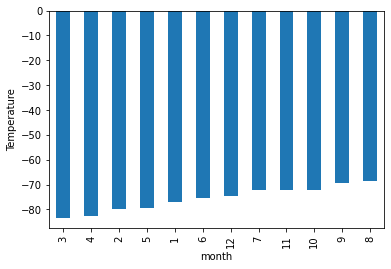

In [29]:
# plotting the graph
averg_min_temp.sort_values().plot(kind='bar')
plt.ylabel('Temperature')
plt.show()

In [40]:

# lowest minimum temperature
print(f"The min average temperature is", min_temp, "and is noticed in 3")
print(f"The max average temperature is", max_temp, "and is noticed in 8")

The min average temperature is -83.30729166666667 and is noticed in 3
The max average temperature is -68.38297872340425 and is noticed in 8


In [34]:
average_pressure = mars_df.groupby('month')['pressure'].mean()
average_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [39]:
min_press=average_pressure.min()
print(min_press)
max_pressure=average_pressure.max()
print(max_pressure)

745.0544217687075
913.3059701492538


In [41]:
# Min and Max average pressure
print(f"The min average pressure is", min_temp, "and is noticed in 6")
print(f"The max average pressure is", max_temp, "and is noticed in 9")

The min average pressure is -83.30729166666667 and is noticed in 6
The max average pressure is -68.38297872340425 and is noticed in 9


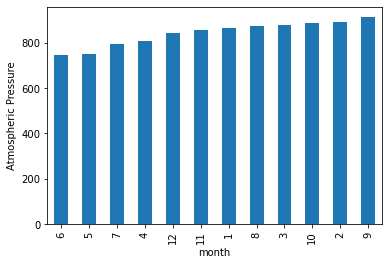

In [42]:
# plotting the graph
average_pressure.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.show()

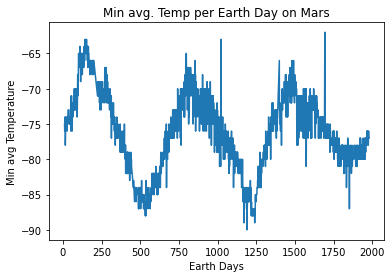

In [43]:

# How many terrestrial (Earth) days exist in a Martian year
x = mars_df['sol']
y = mars_df['min_temp']

plt.plot(x,y)
plt.ylabel("Min avg Temperature")
plt.xlabel("Earth Days")
plt.title("Min avg. Temp per Earth Day on Mars")
plt.show()

#Approx. 650 days in martian year (min to min / max to max)

In [44]:
#Export dataframe to CSV
mars_df.to_csv('mars_df.csv', encoding='utf8', index=False)